In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import torchaudio
import IPython
import pandas as pd
from tqdm import tqdm

/home/gfrost/anaconda3/envs/penguin/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
work_dir = "/home/gfrost/datasets/soapies_balanced_corpora/"

In [3]:
lang_pairs = ["zul","xho","sot","tsn"]
lang_pair = 0
audio_dir = work_dir + "cs_eng" + lang_pairs[lang_pair] + "_balanced/audio"
balanced_dir = work_dir + "cs_eng" + lang_pairs[lang_pair] + "_balanced"

### Fetch labels and map to utterances

In [25]:
spkr_utt_paths = {}
with open(os.path.join(audio_dir,"audio_info.txt")) as f:
    for line in f: 
        if re.search("Input File", line): 
            utt_path = eval(line.split(':')[-1])
            spkr_utt_paths[utt_path.split('/')[-1].split('.')[0]] = utt_path[1:]

In [21]:
len(spkr_utt_paths)

41194

In [27]:
spkr_utt_paths = {}
for (root,dirs,files) in os.walk(audio_dir, topdown=True):
    for file in files:
        if file.split('.')[-1]=='wav':
            spkr = os.path.split(root)[-1]
            utt_path = '/' + os.path.join(spkr, file)
            spkr_utt_paths[file.split('.')[0]]=utt_path

In [5]:
lst_dir = balanced_dir + "/lists"
trn_utt = []
with open(os.path.join(lst_dir,"trn.lst")) as f:
    for line in f: trn_utt.append(line.split('.')[0][1:])

In [6]:
spkr_utt_paths = {utt_id: audio_dir+spkr_utt_paths[utt_id] for utt_id in spkr_utt_paths}
spkr_utt_paths_trn = {utt_id: spkr_utt_paths[utt_id] for utt_id in trn_utt}

In [7]:
def load_utt_tgts(sample_utt_id, lang_tgts_dir):
    spkr = sample_utt_id.split('_')[0]
    with open(os.path.join(lang_tgts_dir,f"{spkr}/{sample_utt_id}.txt")) as f:
        for line in f: lang_targs = line
    lang_targs = np.array([eval(tgt) for tgt in list(lang_targs)])
    return lang_targs

In [8]:
sample_trn_utt_id = list(spkr_utt_paths_trn.keys())[25]
lang_tgts_dir = balanced_dir + "/lang_targs_mult"
print(sample_trn_utt_id)

s00001_u00836


In [9]:
lang_tgts = load_utt_tgts(sample_trn_utt_id, lang_tgts_dir)
#lang_tgts = np.array([eval(tgt) for tgt in list(lang_tgts)])

waveform, sample_rate = torchaudio.load(spkr_utt_paths_trn[sample_trn_utt_id])

In [10]:
# Should both be the same
print(len(waveform[0]))
print(len(lang_tgts))

15744
15744


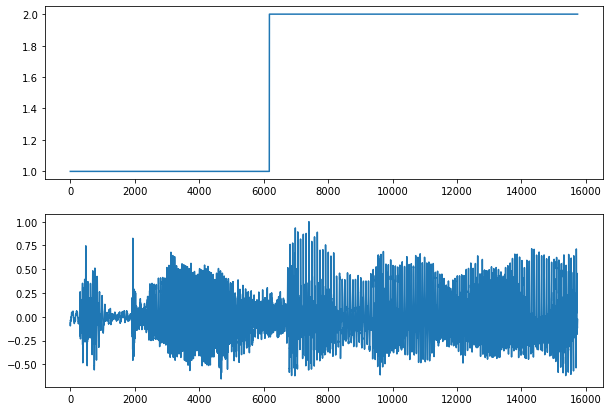

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10,7))
ax[0].plot(lang_tgts)
ax[1].plot(waveform[0])

In [67]:
IPython.display.Audio(spkr_utt_paths_trn[sample_trn_utt_id])

### Data dicts

In [12]:
def construct_datadict(spkr_utt_paths, lang_tgts_dir):
    datadict = {'audio_fpath':[], 'tgts':[]}
    for spkr_utt in tqdm(spkr_utt_paths):
        datadict['audio_fpath'].append(spkr_utt_paths[spkr_utt])
        datadict['tgts'].append(load_utt_tgts(spkr_utt, lang_tgts_dir))
    return datadict

In [13]:
datadict = construct_datadict(spkr_utt_paths_trn, lang_tgts_dir)

100%|██████████| 8381/8381 [10:44<00:00, 13.01it/s]


In [18]:
df = pd.DataFrame.from_dict(datadict)
df.to_csv("cs_eng" + lang_pairs[lang_pair] + "_trn.csv", index=False)

In [20]:
df.head()

,audio_fpath,tgts
0,/media/geoff/datasets/soapies_balanced_corpora...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,/media/geoff/datasets/soapies_balanced_corpora...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,/media/geoff/datasets/soapies_balanced_corpora...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,/media/geoff/datasets/soapies_balanced_corpora...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,/media/geoff/datasets/soapies_balanced_corpora...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
